# TP1 : Data Mining

# Linear Regression with One Variable

In [138]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

data1 = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


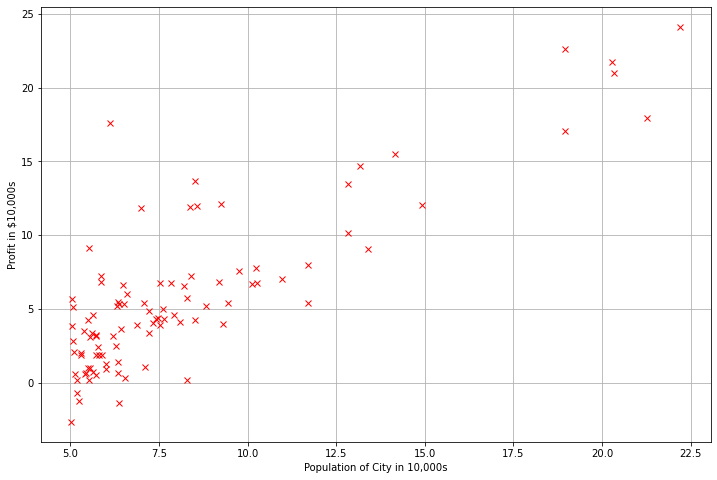

In [139]:
plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data1.Population, data1.Profit, 'rx')

In [140]:
n = len(data1.columns)-1 # subtract the target column

# Create a function to pepare the data.
def prepareData(data, n):
   
    # Add a column with 1s in the data set.
    data.insert(0, 'Ones', 1)

    # Define X and y, separating the data set.
    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

    # Convert to matrices and initialize parameters theta to 0s.
    # Theta is a vector [n + 1 x 1] and Theta Transpose is a vector [1 x n+1],
    # where n is the number of features.
    x = np.matrix(x.values)
    y = np.matrix(y.values)
    theta = np.matrix(np.zeros((n+1, 1)))
    return x, y, theta

x, y, theta = prepareData(data1, n)

In [141]:
iterations = 1500
alpha = 0.01

# Check the dimensions of the matrices.
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

In [142]:
# Create a function to compute cost.
def computeCost(x, y, theta):
   
    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost

computeCost(x, y, theta)

32.072733877455676

In [143]:
# Create a function to implement gradient descent.
def gradientDescent(x, theta, iterations):
   
    
    m = len(x)
    J_vals = []
    
    for i in range(iterations):
        error = (x * theta) - y
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
    return (theta, J_vals)

theta, J_vals = gradientDescent(x, theta, iterations)

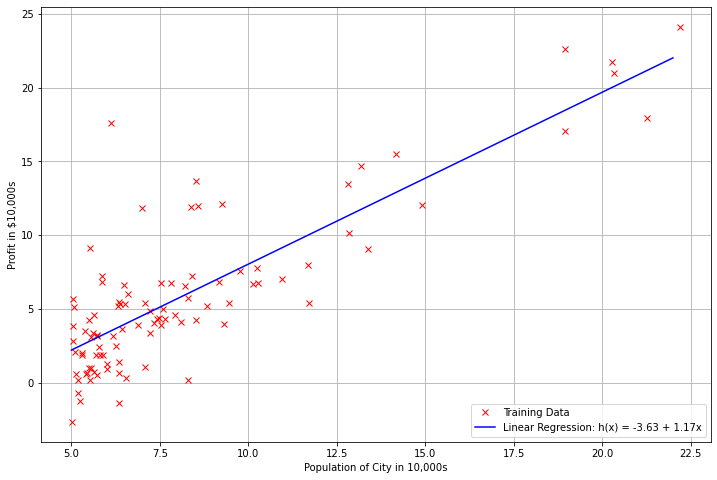

In [144]:
theta_f = list(theta.flat)
xs = np.arange(5, 23)
ys = theta_f[0] + theta_f[1] * xs

plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data1.Population, data1.Profit, 'rx', label='Training Data')
plt.plot(xs, ys, 'b-', label='Linear Regression: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1]))
plt.legend(loc=4)

# Linear Regression with Multiple Variables

In [145]:
data2 = pd.read_csv('ex1data2.txt', names=['taille', 'nbrs_chambres', 'prix'])
data2.describe()

,taille,nbrs_chambres,prix
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [146]:
X_df = pd.DataFrame(data2.taille)
y_df = pd.DataFrame(data2.nbrs_chambres)
z_df = pd.DataFrame(data2.prix)
## Length of our data
m = len(y_df)

In [147]:
m

47

Text(0.5, 0, 'prix')

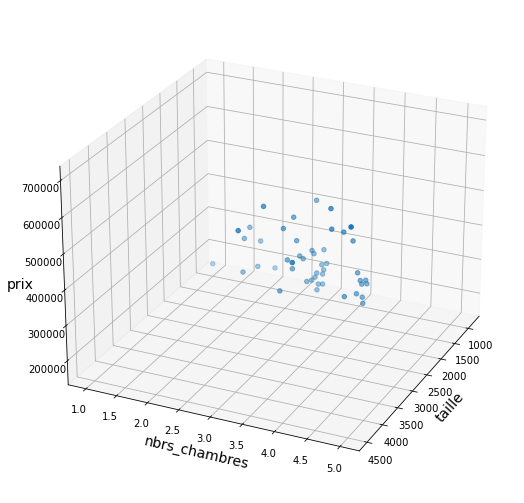

In [148]:
plt.figure(figsize=(15,9))
ax = plt.subplot(projection='3d')
ax.scatter3D(X_df, y_df, z_df, );
ax.view_init(elev=25, azim=25);
ax.set_xlabel('taille', fontsize=14)
ax.set_ylabel('nbrs_chambres', fontsize=14)
ax.set_zlabel('prix', fontsize=14)


In [149]:
data2.size.min(), data2.size.max()

(141, 141)

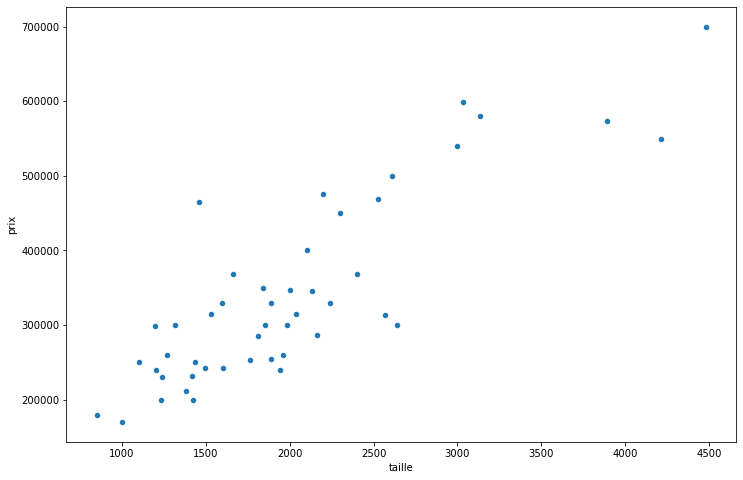

In [150]:
data2.plot.scatter(x='taille', y='prix', figsize=(12,8));

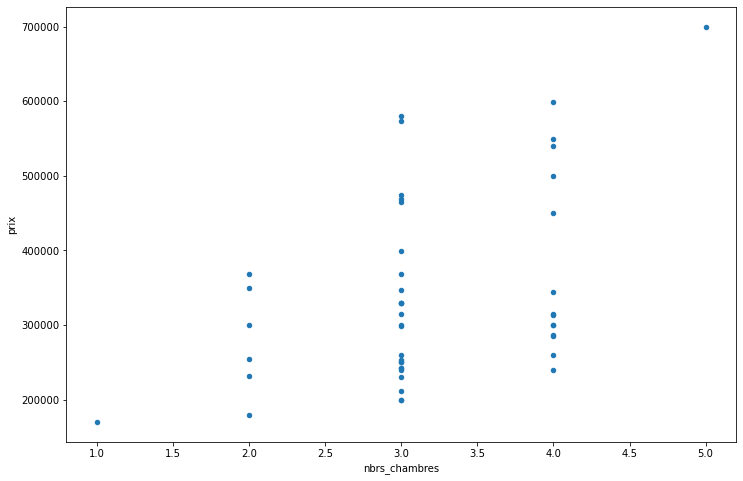

In [151]:
data2.plot.scatter(x='nbrs_chambres', y='prix', figsize=(12,8));

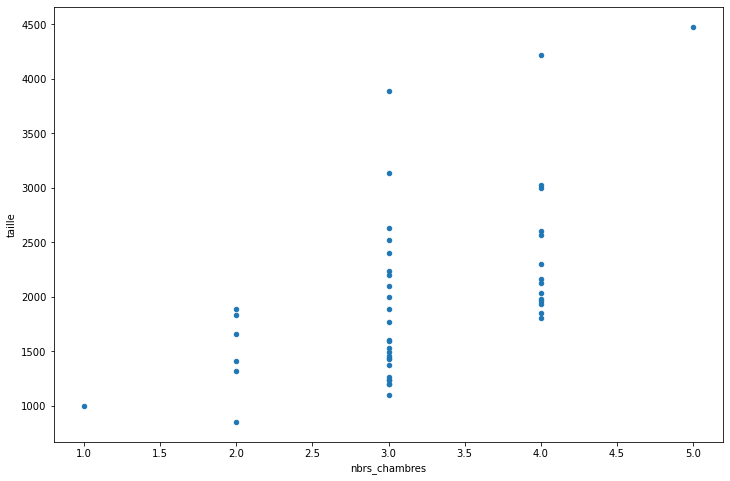

In [152]:
data2.plot.scatter(x='nbrs_chambres', y='taille', figsize=(12,8));

# La Soustraction de la valeur moyenne de chaque caractéristique de l'ensemble de données.

In [153]:
data2Norm1= data2 - data2.mean()
data2Norm1.head()

,taille,nbrs_chambres,prix
0,103.319149,-0.170213,59487.340426
1,-400.680851,-0.170213,-10512.659574
2,399.319149,-0.170213,28587.340426
3,-584.680851,-1.170213,-108412.659574
4,999.319149,0.829787,199487.340426


# La division de les valeurs des
# caractéristiques par leurs "écarts types" respectifs.

In [154]:
data2Norm = (data2 - data2.mean()) / data2.std()
data2Norm.head()

,taille,nbrs_chambres,prix
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


# Gradient Descent

In [155]:
data2.iloc[:, 0:2] = data2.iloc[:, 0:2].apply(lambda x: (x - np.mean(x)) / np.std(x))
data2.describe()

,taille,nbrs_chambres,prix
count,4.700000e+01,4.700000e+01,47.000000
mean,-9.448707e-18,2.480285e-16,340412.659574
std,1.010811e+00,1.010811e+00,125039.899586
min,-1.461049e+00,-2.882690e+00,169900.000000
25%,-7.233261e-01,-2.260934e-01,249900.000000
50%,-1.433229e-01,-2.260934e-01,299900.000000
75%,3.412850e-01,1.102205e+00,384450.000000
max,3.150993e+00,2.430504e+00,699900.000000


In [156]:
n = len(data2.columns)-1
x, y, theta = prepareData(data2, n)

# case of alpha = 0.15 

In [157]:
# Initialize learning rate α.
alpha = 0.15

# Check the dimensions of the matrices.
x.shape, y.shape, theta.shape


((47, 3), (47, 1), (3, 1))

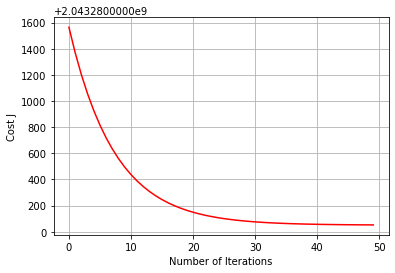

In [159]:
theta, J_vals = gradientDescent(x, theta, iterations=50)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')

plt.grid()
plt.plot(range(50), J_vals, 'r')

# case of alpha=0.01

In [160]:
# Initialize learning rate α.
alpha = 0.01

# Check the dimensions of the matrices.
x.shape, y.shape, theta.shape


((47, 3), (47, 1), (3, 1))

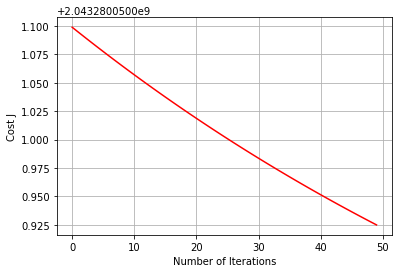

In [163]:
theta, J_vals = gradientDescent(x, theta, iterations=50)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')

plt.grid()
plt.plot(range(50), J_vals, 'r')

# By : Mouhiha Mohamed